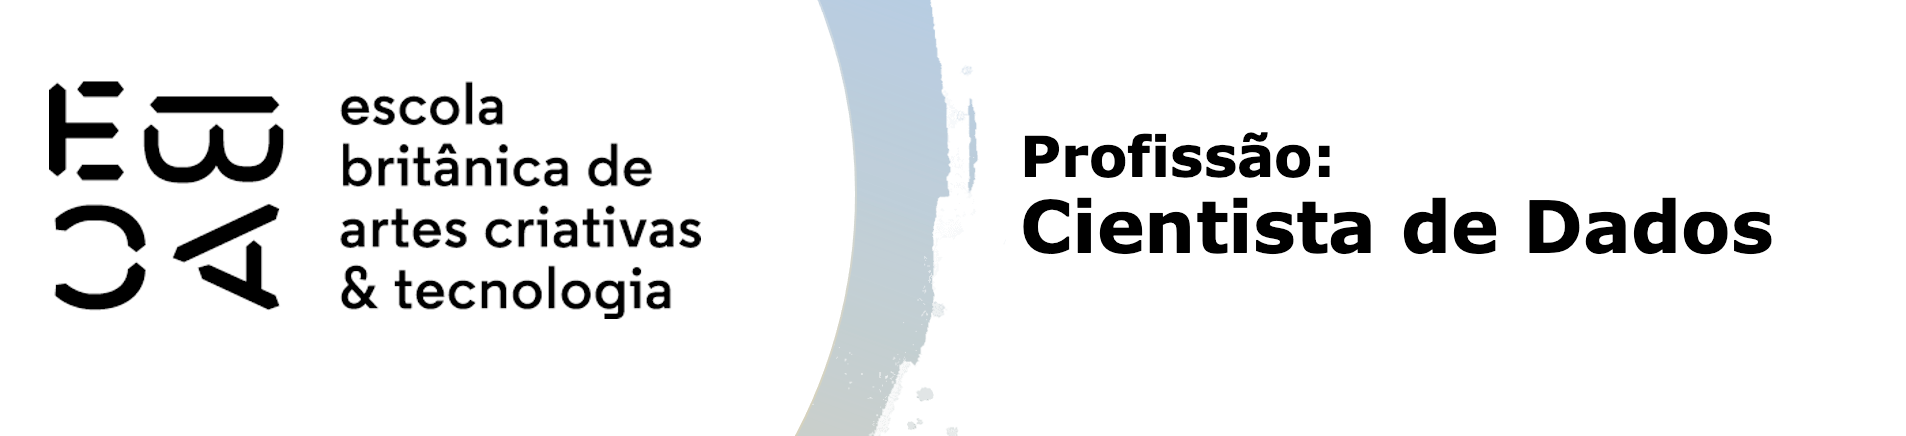

# Módulo 30 - Hierárquicos / aglomerativos

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

## 0. Carregamento de dados 
> Os pacotes necessários para esta tarefa são:
> - pandas, para leitura e edição de dados;
> - matplotlib.pyplot, usado para criação e análise gráfica;
> - seaborn, sendo este um complemento ao matplotlib.pyplot, com uma análise gráfica mais estatística; 
> - numpy, para aplicações algébricas aos dados;
> - gower_matrix do pacote gower, que permite montar a matriz com as distâncias de Gower das variáveis;
> - squareform do pacote scipy.spatial.distance para transformar a matriz de gower em um vetor;
> - dendrogram do scipy.cluster.hierarchy para a montagem de dendrogramas;
> - linkage do scipy.cluster.hierarchy que especifica entre quais pontos foi medida a distância; 
> - fcluster do scipy.cluster.hierarchy para agrupar os dados.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gower import gower_matrix

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

>Os dados mencionados no enunciado encontram-se no arquivo "online_shoppers_intention.csv". Vamos carregar este arquivo e fazer a contagem de pessoas que realizaram as compras online.

In [3]:
# Cria um dataframe com os dados do arquivo csv
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
# Mostra as 5 primeiras linhas do dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Número de pessoas que compraram online: 1908
Número de pessoas que não compraram online: 10422


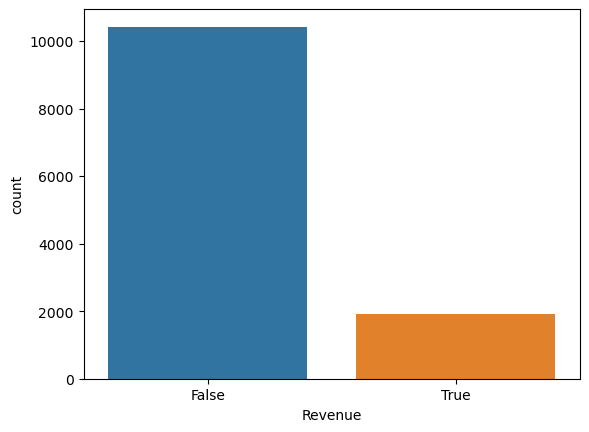

In [5]:
# Conta a quantidade de pessoas que compraram, ou não, na internet 
(nao, sim) = df.Revenue.value_counts(dropna=False)

# Imprime os números de pessoas obtidos
print(f'Número de pessoas que compraram online: {sim}')
print(f'Número de pessoas que não compraram online: {nao}')

# Faz o gráfico de contagem da quantidade de pessoas que compraram ou não
sns.countplot(x='Revenue', data=df)
plt.show()

## 1. Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

> Inicialmente, vejamos quais são os tipos de variáveis que compõem essa base de dados, qual o número de dados faltantes e as distribuições das variáveis.

In [6]:
# Mostra os tipos das variáveis e quantidade de linhas não nulas em cada uma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

> A descrição mostra que quase todas as variáveis são numéricas, exceto "Month", "VisitorType", "Weekend" e "Revenue", sendo estas qualitativas ou booleanas. Além disso, aparentemente, nenhuma das variáveis apresenta dados nulos. Para confirmar esta última observação, vamos fazer a contagem de dados nulos em cada coluna.

In [7]:
# Confirmando que não há valores nulas nas variáveis
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

> Foi confirmado que nenhuma das variáveis tem dados faltantes. Vejamos agora a quantidade de valores presentes em cada variável.

In [8]:
# Mostra a quantidade de valores presentes em cada variável.
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

> Para as variáveis numéricas, vejamos seus valores máximos, mínimos, média, desvio padrão e quartis.

In [9]:
# Mostra as quantidades mencionadas acima
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


> Vejamos o quanto todas as variáveis estão correlacionadas entre si. Para isso, vamos fazer o mapa térmico (heatmap) de todas elas.

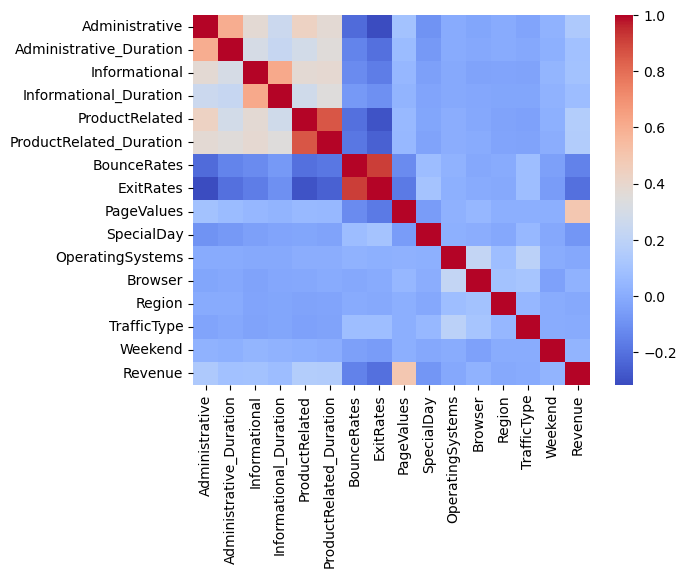

In [10]:
# Heatmap de todas as variáveis do base de dados usada
sns.heatmap(data=df.corr(), cmap='coolwarm')
plt.show()

## 2. Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

> Em relação ao padrão de navegação na sessão, vão ser utilizadas as variáveis:
> - Administrative,
> - Informational,
> - ProductRelated,
> - OperatingSystems,
> - Browser,
> - Region,
> - VisitorType.
>
> As variáveis que indicam a característica da data são:
> - SpecialDay,
> - Month,
> - Weekend.
> 
> Lembrando que as variáveis "Month" e "VisitorType" são categóricas, vamos deixá-las no formato dummy. Além disso, sabemos que nenhuma das variáveis possui dados faltantes.

>Para facilitar a tomada das variáveis mencionadas acima, vamos criar uma lista chamada escopo onde elas serão inseridas.

In [11]:
# Lista com as variáveis que serão usadas na análise
escopo = ["Administrative","Informational","ProductRelated",
          "OperatingSystems","Browser","Region","VisitorType",
          "SpecialDay","Month","Weekend"]

> Seja df_esc o dataframe com as variáveis do escopo, na qual "Month" e "VisitorType" estão no formato dummy.

In [12]:
# Cria um dataframe apenas com as variáveis do escopo
df_esc = pd.get_dummies(df[escopo])

# Mostra as primeiras linhas do df_esc
df_esc.head()

,Administrative,Informational,ProductRelated,OperatingSystems,Browser,Region,SpecialDay,Weekend,VisitorType_New_Visitor,VisitorType_Other,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0,1,1,1,1,0.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,2,2,1,0.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,4,1,9,0.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,3,2,2,0.0,False,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,10,3,3,1,0.0,True,0,0,...,0,0,1,0,0,0,0,0,0,0


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## 3. Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

> Agora que os dataframes com as variáveis do escopo já estão prontos (tanto o dos valores originais, quanto o dos valores padronizados), com as variáveis categóricas no formato dummy, vamos usar a distância de Gower para agrupá-las. Serão feitos dois conjuntos de grupos, sendo um com 3 cluster e outro com 4. Será feito o dendrograma de cada um.
>
> Na utilização da distância de Gower é necessário identificar as variáveis categóricas em questão, ainda que estejam no formato dummy. Vamos separar as variáveis em questão na lista vars_cat.

In [13]:
# Mostra todas as colunas do df_esc
df_esc.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems',
       'Browser', 'Region', 'SpecialDay', 'Weekend', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

> As variáveis categóricas são todas as que estão entre 'VisitorType_New_Visitor' e 'Month_Sep'. Vamos selecioná-las.

In [14]:
# Cria uma lista que diz se a variável da coluna é categórica ou não
vars_cat = [True if x in df_esc.loc[:, 'VisitorType_New_Visitor':'Month_Sep'] else False for x in df_esc.columns]

In [15]:
%%time
# Calcula a distância de Gower entre os dados do df_esc
distancia_gower = gower_matrix(df_esc, cat_features=vars_cat)

Wall time: 8min 14s


In [16]:
# Mostra as 5 primeiras linhas das 3 primeiras colunas da matriz de Gower
distancia_gower[:5, :3]

array([[0.        , 0.01083852, 0.06802721],
       [0.01083852, 0.        , 0.06526029],
       [0.06802721, 0.06526029, 0.        ],
       [0.02359362, 0.0127551 , 0.05250519],
       [0.0697689 , 0.05893038, 0.11058523]], dtype=float32)

> Os dados da matriz de Gower precisam estar no formato vetorial. Para isso, vamos converter a matriz criada em um vetor.

In [17]:
# Insere as distâncias da Matriz de Gower em um vetor
gdv = squareform(distancia_gower,force='tovector')

> Com o vetor pronto, vamos especificar os pontos e distâncias ente eles medidas.

In [18]:
# Associa as distâncias medidas aos pares de dados utilizados
Z = linkage(gdv, method='complete')

# Cria um dataframe com os pares de pontos e distâncias
Z_df = pd.DataFrame(data=Z, columns=['id1','id2','dist','n'])

# Mostra o dataframe criado com os dados das distâncias
Z_df

,id1,id2,dist,n
0,0.0,85.0,0.000000,2.0
1,1.0,18.0,0.000000,2.0
2,132.0,159.0,0.000000,2.0
3,178.0,12332.0,0.000000,3.0
4,9.0,145.0,0.000000,2.0
...,...,...,...,...
12324,24636.0,24648.0,0.322755,2031.0
12325,24653.0,24654.0,0.349018,7506.0
12326,24645.0,24655.0,0.400096,10551.0
12327,24652.0,24656.0,0.451684,12245.0


>  Agora que foram calculadas e associadas as distâncias aos respectivos pares de pontos, separar os dados em 3 grupos, criando o dataframe e depois a tabela com os grupos em questão.

Leaves = 90


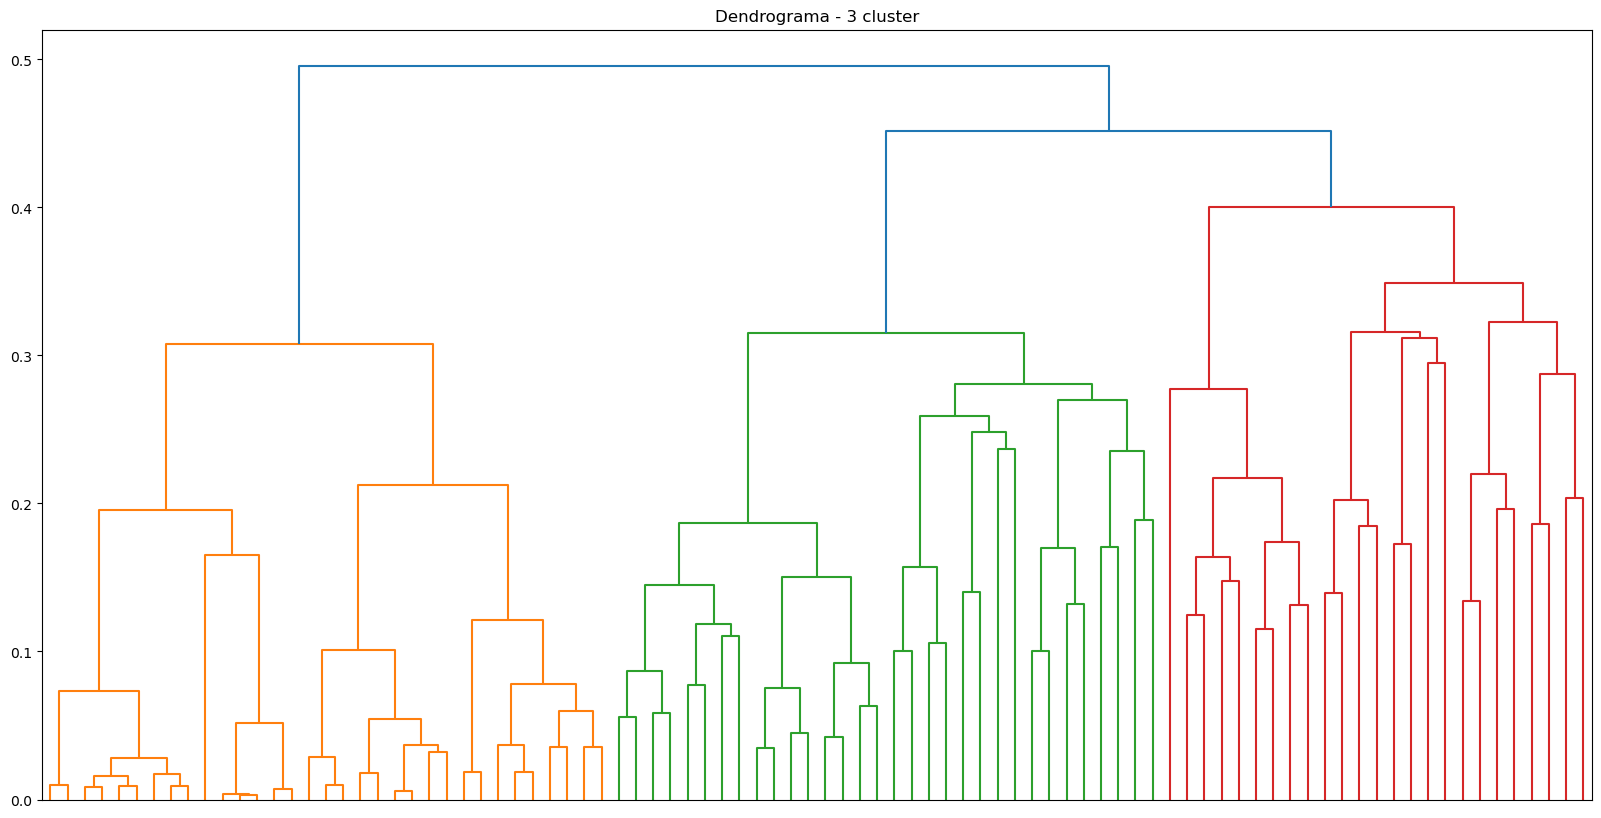

In [19]:
# Cria uma figura 
plt.figure(figsize=(20, 10))

# Título da figura
plt.title("Dendrograma - 3 cluster")

# Cria o dendrograma com os dados de df_pad
dn3 = dendrogram(Z, truncate_mode='level',p=6,show_leaf_counts=True, color_threshold=0.42)

# Mostra o número de folhas que foi usado no Dendrograma
print(f"Leaves = {len(dn3['leaves'])}")

# Remove o eixo x, evitando a poluição visual
plt.xticks([])

# Mostra o dendrograma
plt.show()

In [20]:
# Cria um novo dataframe onde serão inseridos os 3 grupos
df_esc3 = df_esc.copy()

# Cria uma coluna com 3 grupos
df_esc3['grupos3'] = fcluster(Z=Z, t=3, criterion='maxclust')

# Conta o número de integrantes em cada grupo
df_esc3.grupos3.value_counts()

3    10551
2     1694
1       85
Name: grupos3, dtype: int64

<AxesSubplot:xlabel='grupos3', ylabel='count'>

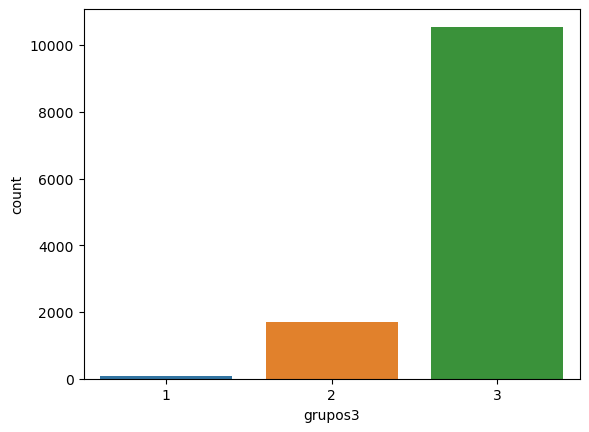

In [21]:
# Gráfico de contagem de integrantes em cada grupo 
sns.countplot(x='grupos3', data=df_esc3)

> Vamos agora repetir os passos acima, mas para 4 clusters.

Leaves = 90


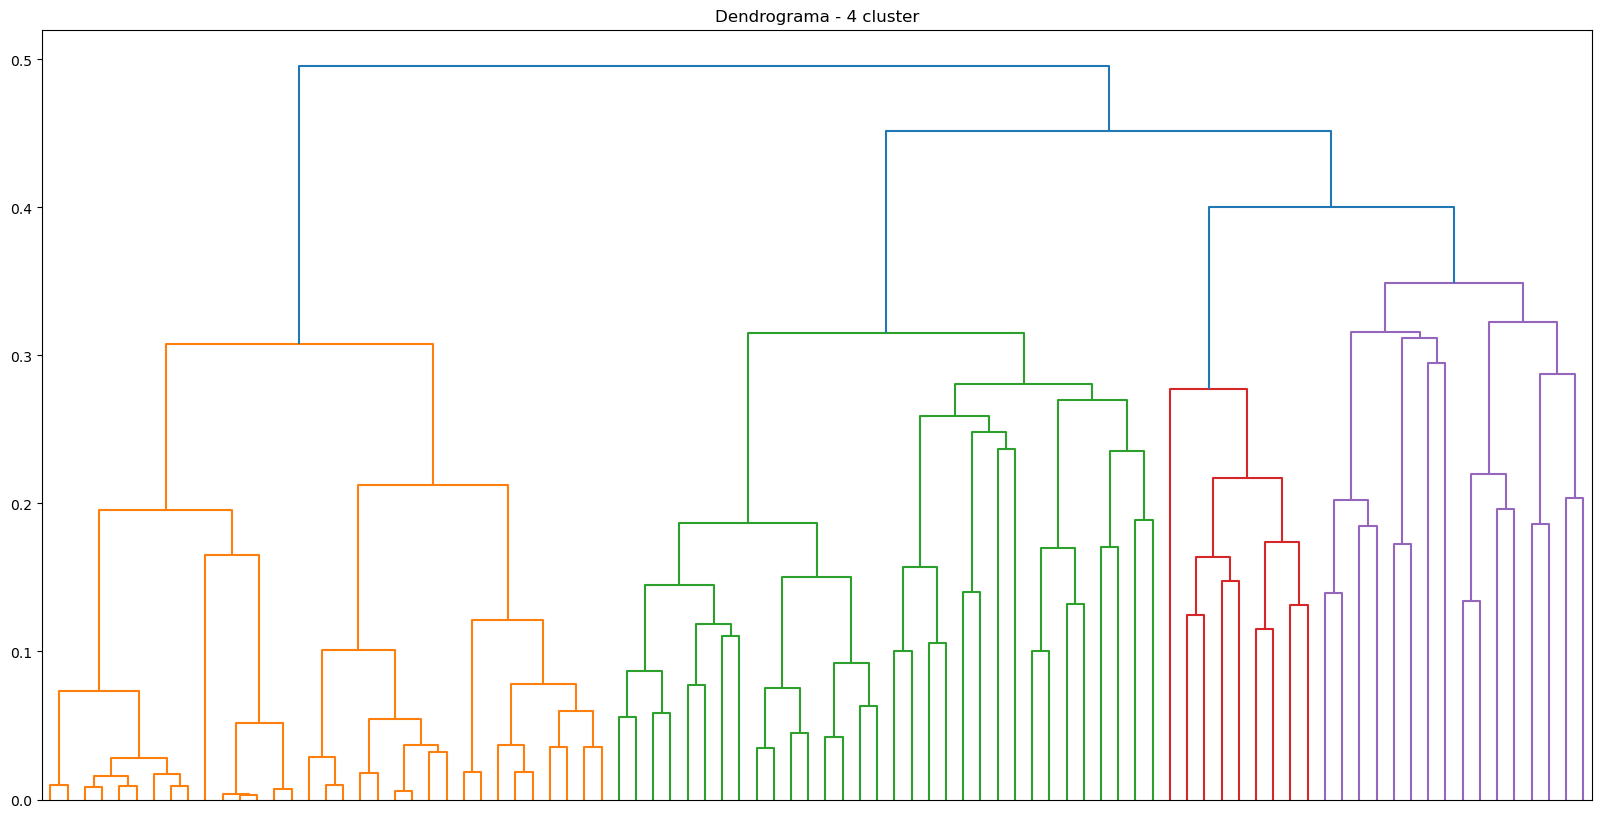

In [22]:
# Cria uma figura
plt.figure(figsize=(20, 10))

# Título da figura
plt.title("Dendrograma - 4 cluster")

# Cria o dendrograma com os dados de df_pad
dn4 = dendrogram(Z, truncate_mode='level',p=6,show_leaf_counts=True, color_threshold=0.4)

# Mostra o número de folhas que foi usado no Dendrograma
print(f"Leaves = {len(dn4['leaves'])}")

# Remove o eixo x, evitando a poluição visual
plt.xticks([])

# Mostra o dendrograma
plt.show()

In [23]:
# Cria um novo dataframe onde serão inseridos os 4 grupos
df_esc4 = df_esc.copy()

# Cria uma coluna com 4 grupos
df_esc4['grupos4'] = fcluster(Z=Z, t=4, criterion='maxclust')

# Conta o número de integrantes em cada grupo
df_esc4.grupos4.value_counts()

4    7506
3    3045
2    1694
1      85
Name: grupos4, dtype: int64

<AxesSubplot:xlabel='grupos4', ylabel='count'>

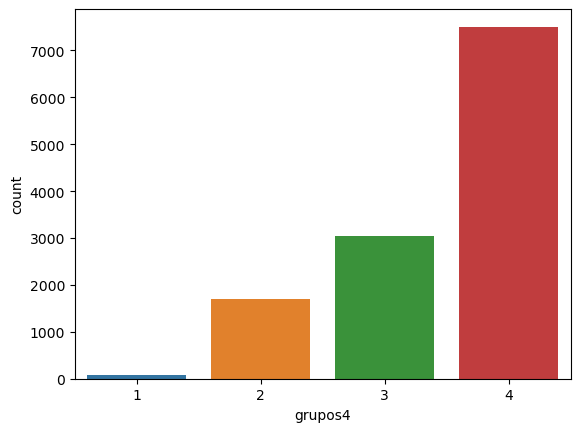

In [24]:
# Gráfico de contagem de integrantes em cada grupo 
sns.countplot(x='grupos4', data=df_esc4)

> Os gráficos mostram que a melhor quantidade de grupos a ser usada é a de 3 clusters.
>
> Para uma melhor análise das relações entre as variáveis, vamos inserir a coluna com os 3 clusters no dataframe original.

In [45]:
# Coloca a coluna com 4 grupos no dataframe original.
df['grupos3'] = df_esc3.grupos3

## 4. Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

> Vamos analisar os 4 grupos criados em relação às variáveis _Revenue_ e _VisitorType_. Para isso, antes vamos criar um index para o dataframe.

In [46]:
# Cria uma lista com o número de linhas no df
index = [i for i in range(len(df))]

# Insere uma coluna no dataframe com os valores da lista acima
df['index'] = index

# Define a coluna 'index' como o índice do df
df.set_index('index')

In [52]:
# Monta uma tabela com as variáveis "VisitorType", "Revenue" em cada grupo
df.groupby(['VisitorType','Revenue','grupos3'])['index'].count().unstack().fillna(0).style.format(precision=0)

Dado que a variável _BounceRates_ é numérica, vamos analisá-la pelo gráfico de medianas em cada grupo.

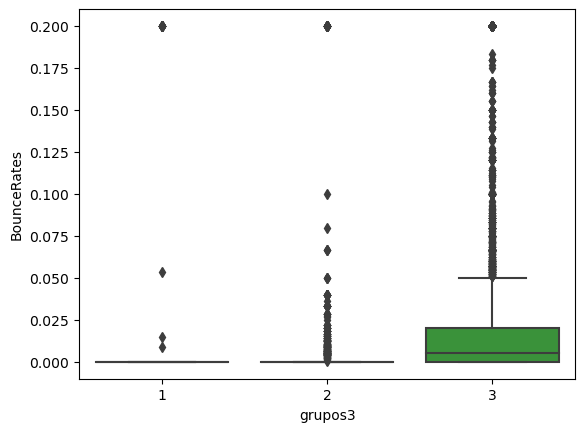

In [56]:
# Gráfico com quartis dos 3 grupos em relação à variável BounceRates
sns.boxplot(x='grupos3', y='BounceRates', data=df)
plt.show()

> Os resultados mostram que os grupos formados dependem do tipo de visitante em questão, podendo ser Novo (_New_Visitor_, grupo 2), Retorno (_Returning_Visitor_, grupo 3) ou Outros (_Other_, grupo 1). A maior parte das pessoas que entram no site e saem sem acionar qualquer request (maior _BounceRates_) encontram-se no grupo 3, ou seja pessoas que já viram o anúncio.
>
> Verificando a razão entre pessoas que realizaram uma compra com as que não fizeram em cada grupo, temos:
> - Grupo 1: 16 / 69 = 0.23
> - Grupo 2: 422 / 1272 = 0.33
> - Grupo 3: 1470 / 9081 = 0.16
>
> Dessa forma, vemos que há maiores chances de compra no grupo 2, ou seja, pessoas que são novas no site, que devem ter visto o anúncio pela primeira vez.